# Affect of mean reward permutation

The S-TaS algorithm always prefers to pull arms with smaller index. Here we are going to the impact of the position of the qualified arm.

In the following, we will set $C = e$, which means $\log C = 1$. This value cannot fulfill the requirement in the paper. But a larger $C$ will only make the stopping times larger.

## Unique Qualified
In the following experiment, we will set only one qualifided arm. And we will record the emprical stopping times of S-TaS when the position of the unique qualified arm is changed.

In [3]:
# import package
import sys  
sys.path.append('./Source/')

from Source.agent import Sticky_TaS_fast
from Source.env import Environment_Gaussian
from tqdm import tqdm
from time import time
import numpy as np

# define parameters
K = 10
xi = 0.5

delta = 0.0001 # useless
log1_over_delta = 100
n_exp = 100

In [4]:
pos_stopping = np.zeros(K)
for pos_opt_arm in range(K):
    rlist = np.zeros(K)
    rlist[pos_opt_arm] = 2
    
    stop_time_ = np.zeros(n_exp)
    for exp_id in tqdm(range(n_exp)):
        env = Environment_Gaussian(rlist=rlist, K=K, random_seed=exp_id)
        agent = Sticky_TaS_fast(K=K, delta=delta, xi=xi, logC=1, log1_over_delta=log1_over_delta)
        
        round_count = 0
        while not agent.stop:
            arm = agent.action()
            reward = env.response(arm)
            output_arm = agent.observe(reward)
            round_count += 1
            if output_arm is not None:
                break
        stop_time_[exp_id] = round_count

    pos_stopping[pos_opt_arm] = np.mean(stop_time_)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 34.43it/s]


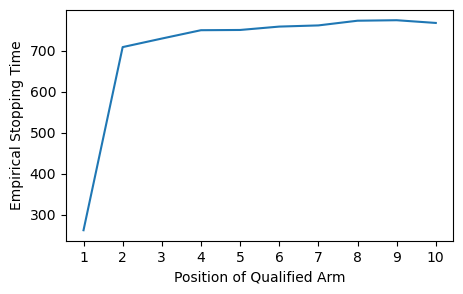

In [5]:
# plot the figure
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, K+1), pos_stopping)
plt.xlabel("Position of Qualified Arm")
plt.xticks(np.arange(1, K+1))
plt.ylabel("Empirical Stopping Time")
plt.show()

# Convergence Speed
In the following cells, I am going to test the convergence speed of S-TaS

In [18]:
# define parameters
K = 5
xi = 0.5

delta = 0.0001 # useless
log1_over_delta_ = np.arange(100, 1000, 200)
n_exp = 100

In [28]:
# conduct the experiment
rlist = np.zeros(K)
rlist[-1] = 1

inverse_delta_stopping_ = np.zeros(len(log1_over_delta_))
for delta_id in range(len(log1_over_delta_)):
    stop_time_ = np.zeros(n_exp)
    for exp_id in tqdm(range(n_exp)):
        env = Environment_Gaussian(rlist=rlist, K=K, random_seed=exp_id)
        agent = Sticky_TaS_fast(K=K, delta=delta, xi=xi, logC=1, log1_over_delta=log1_over_delta_[delta_id])
        
        round_count = 0
        while not agent.stop:
            arm = agent.action()
            reward = env.response(arm)
            output_arm = agent.observe(reward)
            round_count += 1
            if output_arm is not None:
                break
        stop_time_[exp_id] = round_count
    print(np.mean(stop_time_))
    inverse_delta_stopping_[delta_id] = np.mean(stop_time_)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.60it/s]


3547.82


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.44it/s]


5245.88


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.04it/s]


6933.72


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:43<00:00,  2.28it/s]


8612.14


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:58<00:00,  1.71it/s]

10287.18


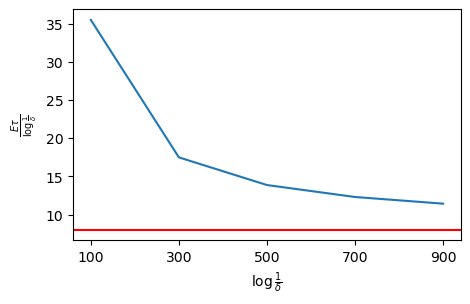

In [29]:
# plot the figure
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.plot(log1_over_delta_, inverse_delta_stopping_ / log1_over_delta_)
plt.xlabel(r"$\log \frac{1}{\delta}$")
plt.xticks(log1_over_delta_)
plt.ylabel(r"$\frac{E\tau}{\log \frac{1}{\delta} }$")
plt.axhline(y=2 / (np.max(rlist)-xi)**2, color='r', linestyle='-')
plt.show()

We can see the convergence speed is very slow, as the ration is close to the $T^*$ only when $\delta<\exp(-100)$.